In [1]:
import os
import re

import numpy as np
import requests

from tqdm import tqdm
import pandas as pd

photo_techniques = [
    "tintypes",
    "acetate+negatives",
    "cyanotypes",
    "cabinet+photographs",
    "nitrate+negatives",
    "wet+collodion+negatives",
    "daguerreotypes",
    "ambrotypes",
    "dry+plate+negatives",
    "cartes+de+visite",
    "gelatin+silver+prints",
    "albumen+prints",
    "portrait+photographs"
]

In [75]:
urls = []
for technique in photo_techniques:
    for start_year in range(1840, 1950, 5):
        url = f"https://www.loc.gov/photos/?dates={start_year}/{start_year + 4}&fa=online-format:image%7Csubject:{technique}"
        urls.append((url, technique))

In [86]:
def parse_result(result, extra_label=None):
    access_restricted = result.get("access_restricted")
    try:
        date = int(result.get("date"))
    except:
        date = None
    image_permalink = result.get("id")
    m = re.match(r"http://www.loc.gov/item/(?P<ID>\d+)/", image_permalink)
    if m is None:
        image_id = None
    else:
        image_id = m.group("ID")
    description = result.get("description")[0]
    image_url = None
    if result.get("image_url"):
        image_url = result.get("image_url")[-1]
    return image_id, image_permalink, image_url, date, description, access_restricted, extra_label


def parse_results(results, extra_label=None, page=None):
    parsed_results = []
    for result in results:
        # don't try to get images from the collection-level result
        if "collection" in result.get("original_format") or "web page" in result.get("original_format"):
            continue
        try:
            parsed_result = parse_result(result, extra_label=extra_label)
            parsed_results.append(parsed_result)
        except Exception as e:
            print(f"[{label}][page {page}]: {e}")
    return parsed_results


def get_next_url(json_response):
    return json_response["pagination"]["next"]


def get_loc_images(url, label, df_dir="info.csv", max_images=1000):
    params = {"fo": "json", "c": 100, "at": "results,pagination"}
    image_data = []
    current_url = url
    page = 0

    try:
        while len(image_data) < max_images and current_url is not None:
            response = requests.get(current_url, params=params)
            if response.status_code != 200:
                print(f"[{label}][page {page}]: Response {response.status_code} at {current_url}")
                return
            json_response = response.json()
            results = json_response['results']
            parsed_results = parse_results(results, extra_label=label, page=page)
            image_data.extend(parsed_results)
            current_url = get_next_url(json_response)
            page += 1
    except Exception as e:
        print(f"[{label}][page {page}]: {e}")
    finally:
        new_df = pd.DataFrame(image_data,
                              columns=["id", "image_permalink", "url",
                                       "year", "description", "access_restricted", "technique"])
        if os.path.exists(df_dir):
            df = pd.read_csv(df_dir)
            concat_df = pd.concat([df, new_df])
            concat_df.to_csv(df_dir, index=False)
            return len(concat_df)
        else:
            new_df.to_csv(df_dir, index=False)
            return len(new_df)

In [93]:
pbar = tqdm(urls)
for (url, label) in pbar:
    total_images = get_loc_images(url, label, max_images=2000, df_dir="new.csv")
    pbar.set_description(f"[{label}] : Downloaded {total_images} images")

Ended on tintypes | Downloaded 1156 images:   3%|▍            | 10/286 [00:22<07:23,  1.61s/it]

[tintypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29855 images:  48%|██▍  | 138/286 [10:01<04:28,  1.81s/it]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29860 images:  49%|██▍  | 139/286 [10:02<03:38,  1.48s/it]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29861 images:  49%|██▍  | 141/286 [10:03<02:27,  1.02s/it]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29862 images:  50%|██▍  | 142/286 [10:04<02:05,  1.15it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29865 images:  50%|██▌  | 143/286 [10:04<01:49,  1.31it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable
[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29878 images:  51%|██▌  | 145/286 [10:06<01:43,  1.36it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable
[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29880 images:  51%|██▌  | 147/286 [10:08<01:55,  1.20it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29888 images:  52%|██▌  | 148/286 [10:08<01:45,  1.30it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29888 images:  52%|██▌  | 149/286 [10:09<01:32,  1.48it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on daguerreotypes | Downloaded 29888 images:  52%|██▌  | 150/286 [10:10<01:44,  1.30it/s]

[daguerreotypes][page 0]: 'NoneType' object is not subscriptable
[daguerreotypes][page 0]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 74062 images:  94%|▉| 269/286 [23:33<05:29, 19.41s/i

[portrait+photographs][page 10]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 76115 images:  94%|▉| 270/286 [24:06<06:14, 23.43s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 11]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 14]: 'NoneType' object is not subscriptable
[portrait+photographs][page 17]: 'NoneType' object is not subscriptable
[portrait+photographs][page 18]: 'NoneType' object is not subscriptable
[portrait+photographs][page 18]: 'NoneType' object is not subscriptable
[portrait+photographs][page 20]: 'NoneType' object is not subscripta

Ended on portrait+photographs | Downloaded 78188 images:  95%|▉| 271/286 [24:45<06:58, 27.93s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portr

Ended on portrait+photographs | Downloaded 78331 images:  95%|▉| 272/286 [24:48<04:49, 20.70s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portr

Ended on portrait+photographs | Downloaded 79215 images:  95%|▉| 273/286 [25:06<04:16, 19.76s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portr

Ended on portrait+photographs | Downloaded 79610 images:  96%|▉| 274/286 [25:14<03:14, 16.25s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 9]: 'NoneType' object is not subscriptable
[portrait+photographs][page 13]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 81702 images:  96%|▉| 275/286 [25:46<03:50, 20.94s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 1]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portr

Ended on portrait+photographs | Downloaded 82981 images:  97%|▉| 276/286 [26:14<03:50, 23.03s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 10]: 'NoneType' object is not subscriptable
[portrait+photographs][page 18]: 'NoneType' object is not subscriptable
[portrait+photographs][page 20]: 'NoneType' object is not subscriptable
[portrait+photographs][page 20]: 'NoneType' object is not subscriptable
[portrait+photographs][page 20]: 'NoneType' object is not subscriptable
[portrait+photographs][page 20]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 85053 images:  97%|▉| 277/286 [26:48<03:56, 26.31s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 13]: 'NoneType' object is not subscriptable
[portrait+photographs][page 14]: 'NoneType' object is not subscriptable
[portrait+photographs][page 14]: 'NoneType' object is not subscriptable
[portrait+photographs][page 14]: 'NoneType' object is not subscriptable
[portrait+photographs][page 19]: 'NoneType' object is not subscriptable
[portrait+photographs][page 20]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 87124 images:  97%|▉| 278/286 [27:21<03:48, 28.50s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 10]: 'NoneType' object is not subscriptable
[portrait+photographs][page 10]: 'NoneType' object is not subscriptable
[portrait+photographs][page 11]: 'NoneType' object is not subscriptable
[portrait+photographs][page 11]: 'NoneType' object is not subscriptable
[p

Ended on portrait+photographs | Downloaded 89179 images:  98%|▉| 279/286 [27:59<03:38, 31.24s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 3]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 9]: 'NoneType' object is not subscriptable
[portrait+photographs][page 9]: 'NoneType' object is not subscriptable
[portrait+photographs][page 9]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[port

Ended on portrait+photographs | Downloaded 91244 images:  98%|▉| 280/286 [28:38<03:22, 33.69s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 4]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portrait+photographs][page 11]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 12]: 'NoneType' object is not subscriptable
[portrait+photographs][page 13]: 'NoneType' object is not subscriptable
[p

Ended on portrait+photographs | Downloaded 93315 images:  98%|▉| 281/286 [29:16<02:54, 34.97s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 6]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portr

Ended on portrait+photographs | Downloaded 95359 images:  99%|▉| 282/286 [29:57<02:26, 36.55s/i

[portrait+photographs][page 0]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 2]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 5]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 7]: 'NoneType' object is not subscriptable
[portrait+photographs][page 8]: 'NoneType' object is not subscriptable
[portr

Ended on portrait+photographs | Downloaded 97407 images:  99%|▉| 283/286 [30:35<01:51, 37.23s/i

[portrait+photographs][page 18]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 101096 images: 100%|▉| 285/286 [31:44<00:35, 35.75s/

[portrait+photographs][page 6]: 'NoneType' object is not subscriptable


Ended on portrait+photographs | Downloaded 103183 images: 100%|█| 286/286 [32:18<00:00,  6.78s/


In [130]:
df = pd.read_csv("new.csv")

In [100]:
df.groupby("technique").count()

,id,image_permalink,url,year,description,access_restricted
technique,,,,,,
acetate+negatives,11948,11948,11944,11948,11948,11948
albumen+prints,10103,10120,10091,10120,10120,10120
ambrotypes,841,841,839,841,841,841
cabinet+photographs,474,475,475,475,475,475
cartes+de+visite,3140,3145,3090,3145,3145,3145
cyanotypes,954,954,954,951,954,954
daguerreotypes,919,919,915,919,919,919
dry+plate+negatives,15708,15708,15708,15708,15708,15708
gelatin+silver+prints,9261,9267,9252,9234,9267,9267


In [101]:
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8

In [105]:
df_sampled = df.sample(10_000).sort_values(by="year")

<AxesSubplot:xlabel='year', ylabel='technique'>

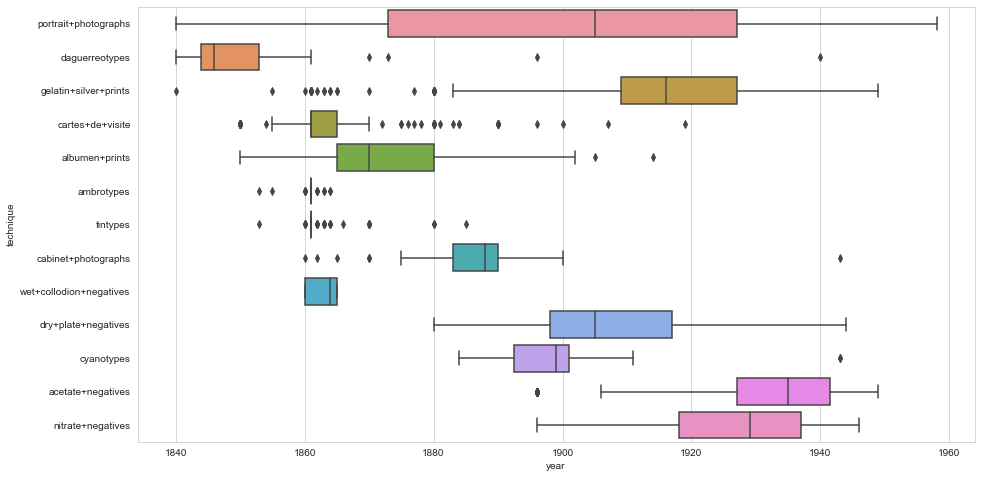

In [106]:
sns.boxplot(x="year", y="technique", data=df_sampled.sort_values("year"))

In [107]:
def to_5_years(year: int) -> str:
    if year is None:
        return "None"
    century, decade, unit = str(year)[:2], str(year)[2], str(year)[3]
    if int(unit) < 5:
        return f"{century}{decade}0-4"
    return f"{century}{decade}5-9"

In [138]:
def make_filename(id_, year, technique):
    try:
        technique = technique.replace("+", "")
        return os.path.join(to_5_years(int(year)), f"{str(int(id_))}_{technique}_{int(year)}.jpg")
    except Exception as e:
        return pd.NA

In [120]:
import numpy as np

In [128]:
df["id"] = df["id"].apply(lambda x: str(int(x)) if pd.notna(x) else None)

ValueError: invalid literal for int() with base 10: '2015650656.0'

In [139]:
df["filename"] = df.apply(lambda x: make_filename(x["id"], x["year"], x["technique"]), axis=1)

In [127]:
df["id"].dtype

dtype('O')

In [146]:
df.dropna(subset=["filename", "url"], inplace=True)

In [145]:
df.shape

(103183, 8)

In [148]:
df["year"] = df["year"].astype(int)

In [151]:
df = df.loc[(df["year"] < 1950) & (df["year"] >= 1840)]

In [153]:
df["id"] = df["id"].astype(int)

In [154]:
df

,id,image_permalink,url,year,description,access_restricted,technique,filename
0,2015650656,http://www.loc.gov/item/2015650656/,https://tile.loc.gov/storage-services/service/...,1845,2 photographs : daguerreotype and tintype ; da...,False,tintypes,1845-9/2015650656_tintypes_1845.jpg
1,2006688336,http://www.loc.gov/item/2006688336/,https://tile.loc.gov/storage-services/service/...,1853,1 photograph : approximate sixth-plate tintype...,False,tintypes,1850-4/2006688336_tintypes_1853.jpg
2,650013,http://www.loc.gov/item/00650013/,https://www.loc.gov/static/images/original-for...,1850,11 photographic prints on cartes de visite mou...,True,tintypes,1850-4/650013_tintypes_1850.jpg
3,2006688335,http://www.loc.gov/item/2006688335/,https://tile.loc.gov/storage-services/service/...,1853,1 photograph : approximate sixth-plate tintype...,False,tintypes,1850-4/2006688335_tintypes_1853.jpg
4,2006688337,http://www.loc.gov/item/2006688337/,https://tile.loc.gov/storage-services/service/...,1853,1 photograph : approximate sixth-plate tintype...,False,tintypes,1850-4/2006688337_tintypes_1853.jpg
...,...,...,...,...,...,...,...,...
103170,94510435,http://www.loc.gov/item/94510435/,https://tile.loc.gov/storage-services/service/...,1945,"1 photographic print. | Emperor Hirohito, wear...",True,portrait+photographs,1945-9/94510435_portraitphotographs_1945.jpg
103171,2018722831,http://www.loc.gov/item/2018722831/,https://tile.loc.gov/storage-services/service/...,1945,1 negative : safety ; 4x5 in.,False,portrait+photographs,1945-9/2018722831_portraitphotographs_1945.jpg
103175,2021669950,http://www.loc.gov/item/2021669950/,https://tile.loc.gov/image-services/iiif/servi...,1946,The Florida sponge diving industry developed i...,False,portrait+photographs,1945-9/2021669950_portraitphotographs_1946.jpg
103178,2005676941,http://www.loc.gov/item/2005676941/,https://tile.loc.gov/storage-services/service/...,1948,1 photographic print. | Photograph shows Virgi...,True,portrait+photographs,1945-9/2005676941_portraitphotographs_1948.jpg


In [155]:
df.to_csv("loc.csv", index=False)